In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas,numpy,random
import matplotlib.pyplot as plt

In [6]:
# mount Drive to access data files

from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [7]:
# dataset class

class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        # return label, image data tensor and target tensor
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass

    pass

In [8]:
mnist_dataset=MnistDataset('mount/My Drive/colab notebooks/mnist_data/mnist_train.csv')

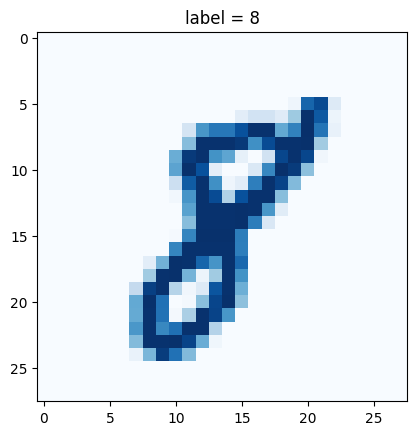

In [9]:
mnist_dataset.plot_image(17)

In [10]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()

    self.model=nn.Sequential(
        nn.Linear(784,200),
        nn.Sigmoid(),
        nn.Linear(200,1),
        nn.Sigmoid()
    )

    self.loss_function=nn.MSELoss()

    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)

    self.counter=0
    self.progress=[]

    pass


  def forward(self,inputs):
    return self.model(inputs)


  def train(self,inputs,targets):
    outputs=self.forward(inputs)
    loss=self.loss_function(outputs,targets)

    self.counter+=1

    if(self.counter %10 ==0):
      self.progress.append(loss.item())
      pass
    if (self.counter % 10000 ==0):
      print("counter = " ,self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
     df=pandas.DataFrame(self.progress,columns=['loss'])
     df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker=".",
            grid=True,yticks=(0,0.25,0.5))
     pass






In [11]:
# function to generate uniform random data

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [12]:
D=Discriminator()

for label,image_data_tensor,target_tensor in mnist_dataset:
  D.train(image_data_tensor,torch.FloatTensor([1.0]))
  D.train(generate_random(784),torch.FloatTensor([0.0]))
  pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


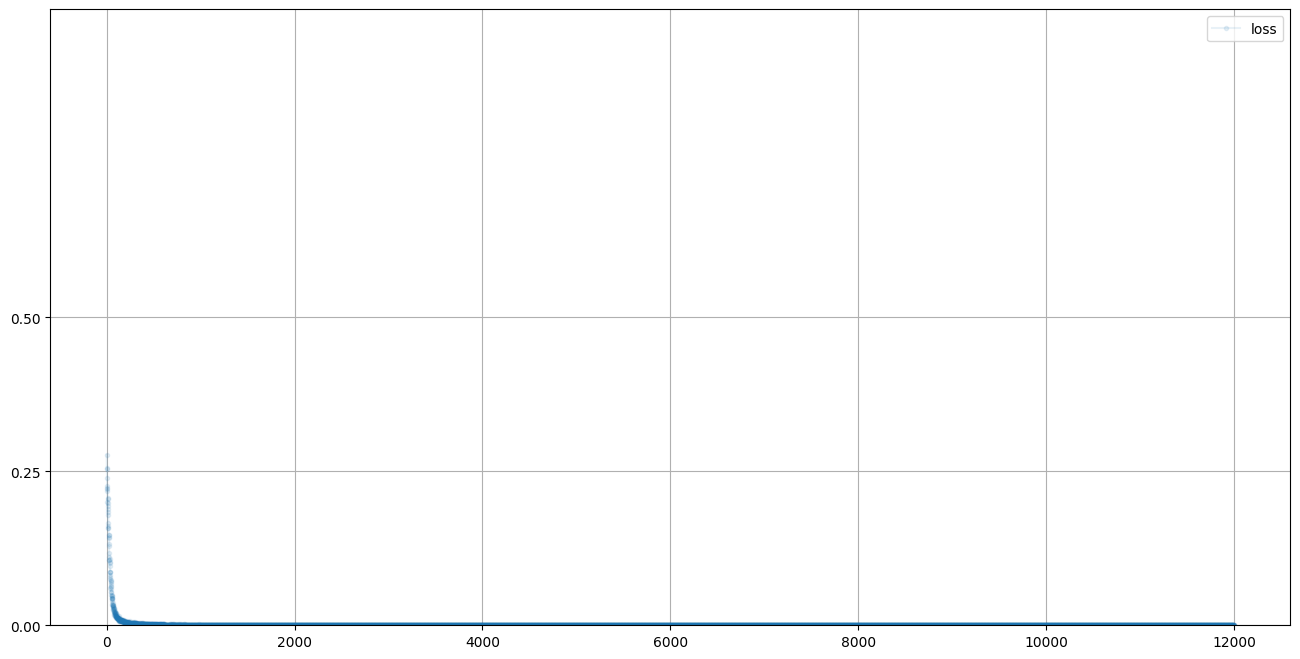

In [13]:
D.plot_progress()

In [14]:
for i in range(4):
  image_data_tesnor=mnist_dataset[random.randint(0,60000)][1]
  print(D.forward(image_data_tensor).item())
  pass


for i in range(4):
  print(D.forward(generate_random(784)).item())
  pass


0.9940568208694458
0.9940568208694458
0.9940568208694458
0.9940568208694458
0.0055984449572861195
0.007467764895409346
0.005585754755884409
0.009279330261051655


In [15]:
# import libraries

import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt

In [16]:
# generator class

class Generator(nn.Module):

    def __init__(self):
        # initialise parent pytorch class
        super().__init__()

        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass


    def forward(self, inputs):
        # simply run model
        return self.model(inputs)


    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)

        # pass onto Discriminator
        d_output = D.forward(g_output)

        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass


    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass

    pass

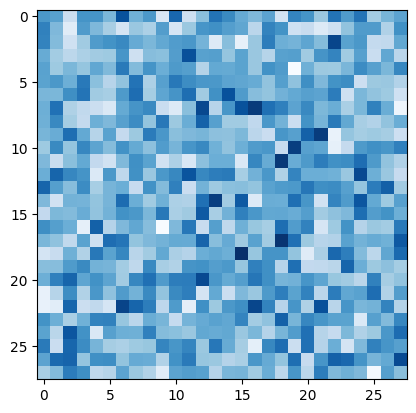

In [17]:
G=Generator()
output=G.forward(generate_random(1))
img=output.detach().numpy().reshape(28,28)
plt.imshow(img,interpolation='none',cmap='Blues')

In [19]:
%%time

D=Discriminator()
G=Generator()

for label,image_data_tensor,target_tensor in mnist_dataset:

  D.train(image_data_tensor,torch.FloatTensor([1.0]))

  D.train(G.forward(generate_random(1)).detach(),torch.FloatTensor([0.0]))

  G.train(D,generate_random(1),torch.FloatTensor([1.0]))

  pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 4min 59s, sys: 3.57 s, total: 5min 2s
Wall time: 5min 54s


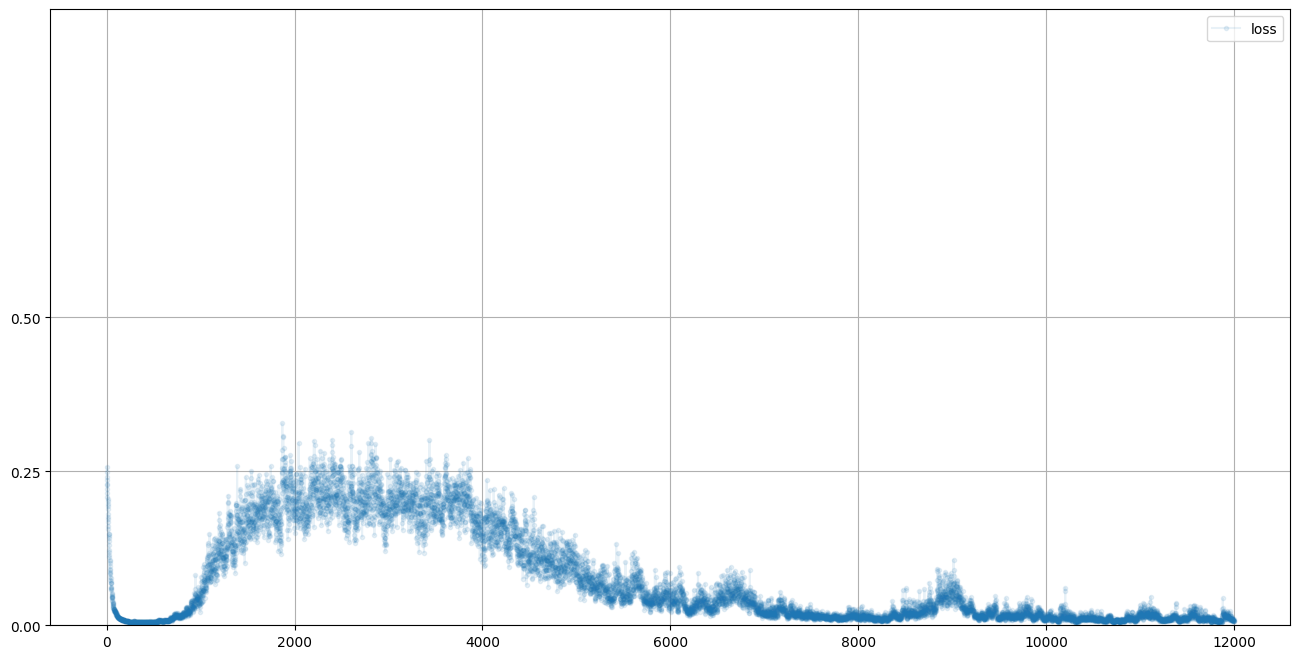

In [21]:
D.plot_progress()

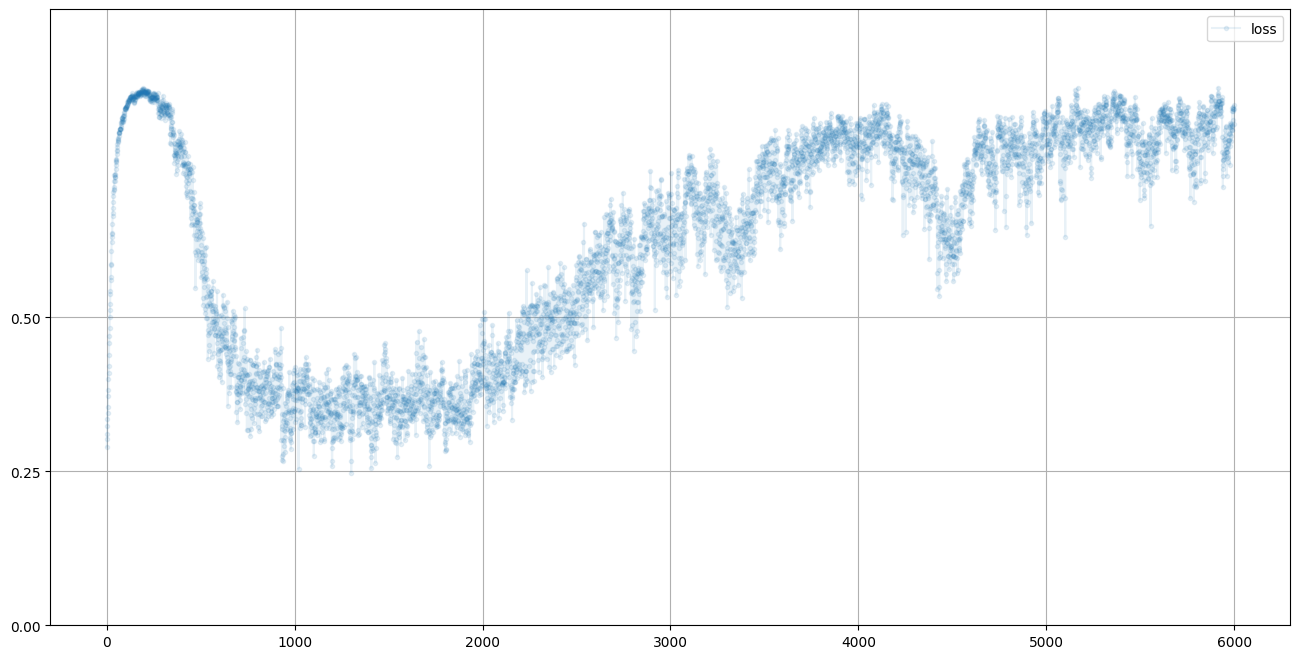

In [22]:
G.plot_progress()

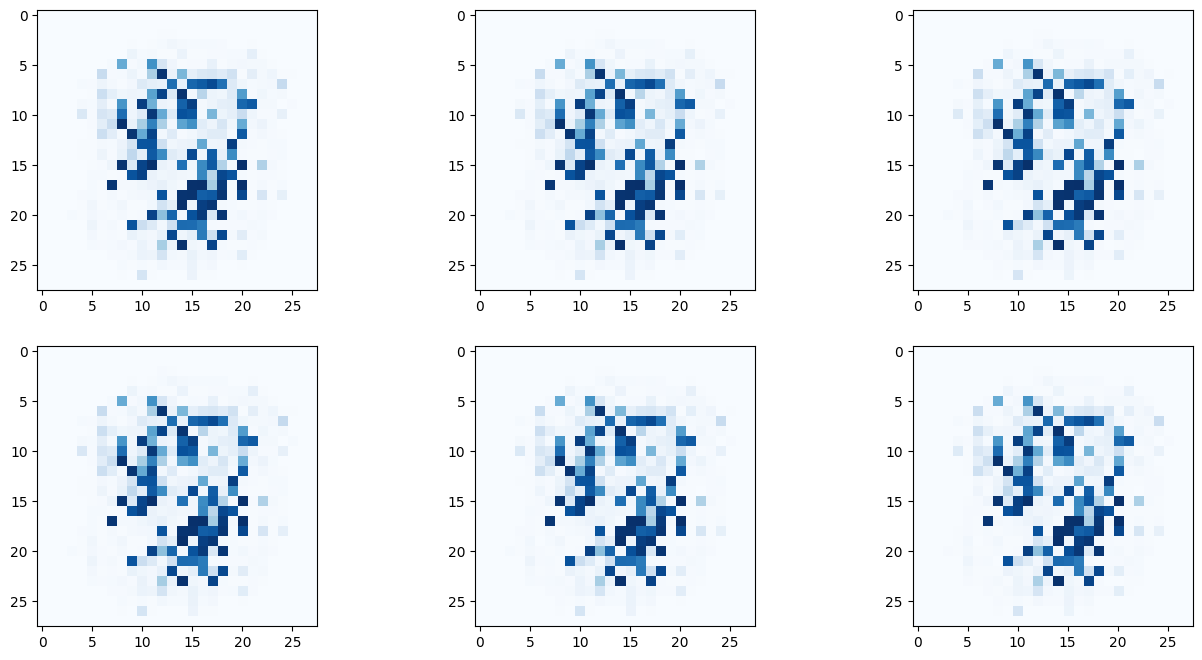

In [23]:
f, axarr=plt.subplots(2,3,figsize=(16,8))

for i in range(2):
  for j in range(3):
    output=G.forward(generate_random(1))
    img=output.detach().numpy().reshape(28,28)

    axarr[i,j].imshow(img,interpolation='none',cmap='Blues')
    pass
  pass

